In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:5

2.0.0-beta1


# import fashion mnist dataset

In [3]:
f_m = keras.datasets.fashion_mnist

(x_, y_), (x, y) = f_m.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# explore the data

In [9]:
x_.shape, len(x_), y_.shape, y_[0], x.shape, y[0], y.shape

((60000, 28, 28), 60000, (60000,), 9, (10000, 28, 28), 9, (10000,))

x_: train data, x: test data

# process the data

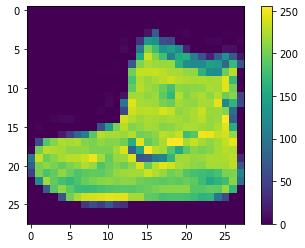

In [10]:
plt.figure()
plt.imshow(x_[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# scale the features
x_ = x_ / 255.0
x = x / 255.0

x_[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

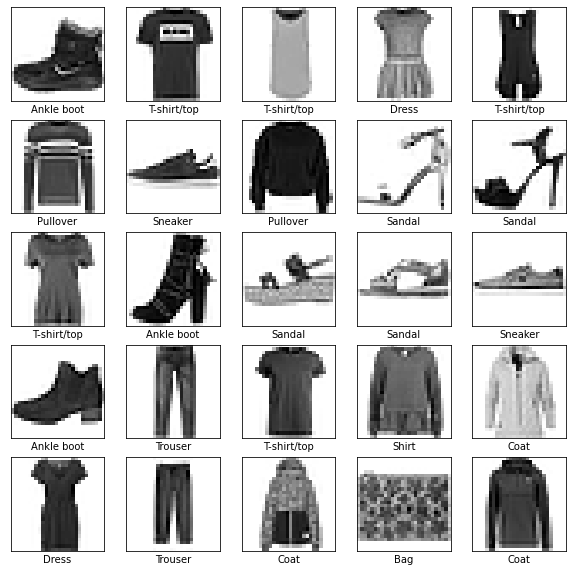

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_[i]])
plt.show()

# build the model

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [14]:
# set up layers, use tf.keras.layers.Dens()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # transfor the data into 1-D array
    keras.layers.Dense(128, activation='relu'),  # fully connect layer, has 128 neurons
    keras.layers.Dense(10)   # 10 classes means 10 neurons
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# compile the model

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [17]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# train the model
1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [18]:
model.fit(x_, y_, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4982 - accuracy: 0.8249
Epoch 2/12
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3777 - accuracy: 0.8643
Epoch 3/12
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3391 - accuracy: 0.8767
Epoch 4/12
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3147 - accuracy: 0.8836
Epoch 5/12
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2943 - accuracy: 0.8913
Epoch 6/12
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2805 - accuracy: 0.8955
Epoch 7/12
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2680 - accuracy: 0.8994
Epoch 8/12
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2587 - accuracy: 0.9041
Epoch 9/12
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2472 - accuracy: 0.9074
Epoch 10/12
60

# evalutate accuracy

In [19]:
test_loss, test_acc = model.evaluate(x, y, verbose=2)
print('test_loss: ', test_loss, '\n',
     'test_acc: ', test_acc)

10000/10000 - 0s - loss: 0.3411 - accuracy: 0.8857
test_loss:  0.34106808969974517 
 test_acc:  0.8857


test accuracy is  a little less than train, may overfitting
- Demonstrate overfitting
- Strategies to prevent overfitting

# predict

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(x)

In [27]:
predictions[0], np.argmax(predictions[0]), y[0]

(array([5.3454380e-10, 5.4197945e-11, 1.2829908e-10, 8.4377194e-10,
        1.7002135e-08, 2.2443272e-03, 3.6512025e-09, 1.3865458e-02,
        1.9490814e-08, 9.8389012e-01], dtype=float32),
 9,
 9)

In [28]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

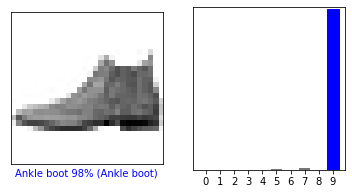

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, x)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

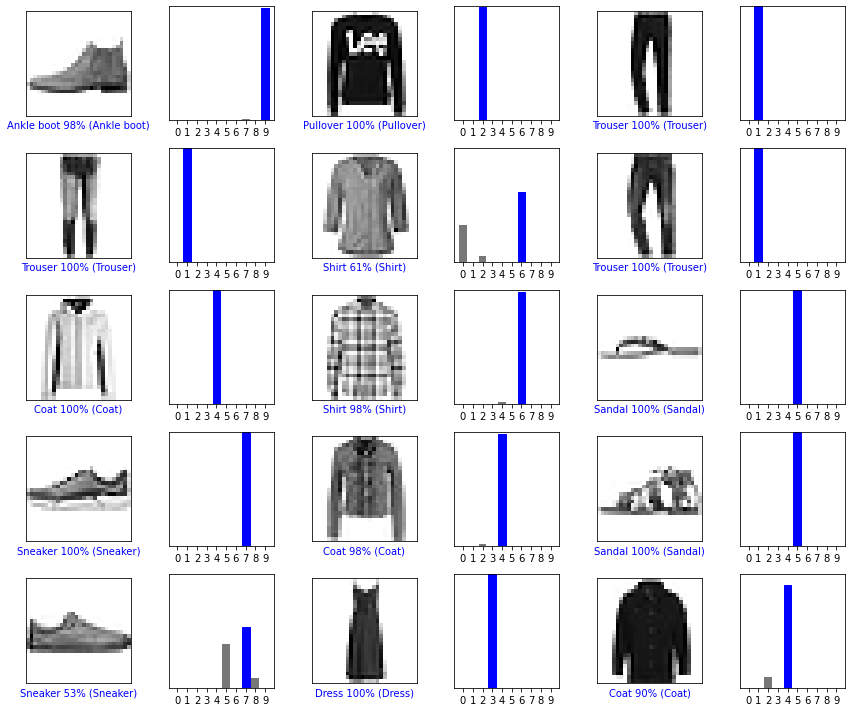

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y, x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y)
plt.tight_layout()
plt.show()

In [36]:
# use the model to predict a single image
img = x[1]

print(img.shape)

(28, 28)


(1, 28, 28)
[[1.0296721e-04 2.1956665e-15 9.9664670e-01 5.4075624e-13 3.2132238e-03
  1.9862431e-11 3.7084177e-05 3.0956299e-15 1.6604558e-10 3.6148533e-15]]


2

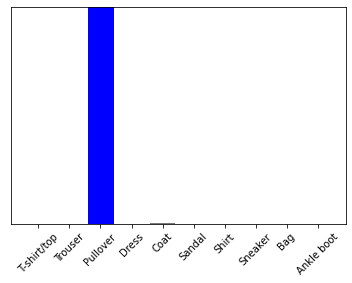

In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])

结论：
1. 这部分使用tensorflow.keras 对MNIST数据集进行图像分类
2. 熟悉了机器学习基本流程
  - 导入数据
  - 训练数据
  - 构建模型
  - 训练模型
  - 预测结果
 